In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Import necessary libraries
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
warnings

<module 'warnings' from '/Users/valentina/anaconda3/lib/python3.7/warnings.py'>

In [2]:
df = pd.read_csv('zillow_data.csv')

In [3]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


# Step 2: Data Preprocessing

In [4]:
dates = pd.to_datetime(df.columns.values[7:], format='%Y-%m')

In [5]:
df['delta17-18'] = (df['2018-04'] - df['2017-04'])/(df['2017-04'])
df['delta16-18'] = (df['2017-04'] - df['2016-04'])/(df['2016-04'])
df['delta15-18'] = (df['2016-04'] - df['2015-04'])/(df['2015-04'])

In [6]:
d1 = df.sort_values(by='delta17-18',ascending=False).head(20)
d2 = df.sort_values(by='delta16-18',ascending=False).head(20)
d3 = df.sort_values(by='delta15-18',ascending=False).head(20)

In [ ]:
print(d1.RegionName,d2.RegionName, d3.RegionName)

In [ ]:
print(list(d1.City),list(d2.City), list(d3.City))

In [7]:
df1 = df[df.RegionName==27980]
df2 = df[df.RegionName==29405]
df3 = df[df.RegionName==34785]
df4 = df[df.RegionName==30032]
df5 = df[df.RegionName==88415]
df_list = [df1,df2,df3,df4,df5]

In [11]:
df5

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
12418,95645,88415,Clayton,NM,NaN,Union,12419,NaN,NaN,NaN,...,110400,110500,108600,108300,113100,117400,114900,110900,109900,110500


In [ ]:
# check for data types and percentage of null values in each column
(df.isna().sum()).sum()

In [ ]:
# replace NaN cells with previous value
for c in df.columns:
    if type(df[c][0]) != str :
        #df[c] = df[c].ffill()
        df[c] = df[c].fillna(np.median(df[c]))

In [ ]:
# check for any other 
(df.isna().sum()).sum()

In [ ]:
# drop remaining rows with NaN values (Metro)
df1.dropna(inplace=True)

In [8]:
for d in df_list:
    d.drop('delta17-18',axis=1,inplace=True)
    d.drop('delta16-18',axis=1,inplace=True)
    d.drop('delta15-18',axis=1,inplace=True)

# Step 3: EDA and Visualization

In [ ]:
df = df.sort_values(by=['State','City','SizeRank'])

# Step 4: Reshape from Wide to Long Format

In [9]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionID','SizeRank','RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted.set_index('time',inplace=True)
    return melted
    #return melted.groupby('time').aggregate({'value':'mean'})
    

TypeError: Empty 'DataFrame': no numeric data to plot

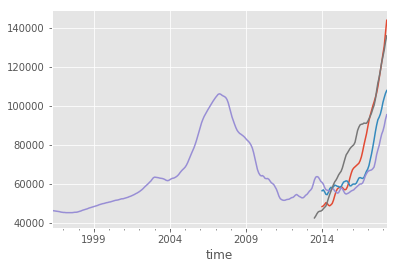

In [10]:
#df_hert = melt_data(df_hert)
for d in df_list:
    d = melt_data(d)
    d.dropna(inplace=True)
    d.value.plot()

    

In [ ]:
df = melt_data(df).sort_values(by=['State','Metro','City','RegionName'])

In [ ]:

df1 = melt_data(df1[:-1]).sort_values(by=['State','Metro','City','RegionName'])


In [ ]:
df1.value.plot(figsize=(20,10))
plt.ylabel('Value')

In [ ]:
df1

In [ ]:
states = df.State.unique()
metros = df.Metro.unique()
cities = df.City.unique()
zipcodes = df.RegionName.unique()

In [ ]:
for s in states:
    plt.Figure(figsize=(20,15))
    print(s)
    df_s = df[df.State == s]
    metros = df_s.Metro.unique()
    for m in metros:
        df_m = df_s[df_s.Metro == m]
        zipcodes = df_m.RegionName.unique()
        for z in zipcodes:
            
            df_z = df_m[df_m.RegionName == z]
            values = df_z.value
            plt.plot(values)
            plt.title(s)
    plt.show()


# Step 5: ARIMA Modeling

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

for s in states[0:2]:
    plt.Figure(figsize=(20,15))
    print(s)
    df_s = df[df.State == s]
    metros = df_s.Metro.unique()
    for m in metros[0:2]:
        print(m)
        df_m = df_s[df_s.Metro == m]
        zipcodes = df_m.RegionName.unique()
        for z in zipcodes[0:10]:
            df_z = df_m[df_m.RegionName == z]
            series = df_z.value
            print(z)
            

In [ ]:
print('hi')

In [ ]:
for s in states:
    plt.Figure(figsize=(20,15))
    print(s)
    df_s = df[df.State == s]
    metros = df_s.Metro.unique()
    for m in metros:
        df_m = df_s[df_s.Metro == m]
        zipcodes = df_m.RegionName.unique()
        for z in zipcodes: 
            df_z = df_m[df_m.RegionName == z]
            values = df_z.value
            values_diff = values.diff(periods=60)
            pd.plotting.autocorrelation_plot(values)
            plt.title(s)
    plt.show()


In [ ]:
# Look at ACF and PACF of time series
pd.plotting.autocorrelation_plot(trend1_diff)

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(trend1_diff, lags = 100);

In [ ]:
# Decide AR, MA and order of these models

In [ ]:
# Fit model to get the correct paramenters
# and use for predicition

In [ ]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value


for s in states[0:1]:
    plt.Figure(figsize=(20,15))
    print(s)
    df_s = df[df.State == s]
    metros = df_s.Metro.unique()
    for m in metros[0:1]:
        df_m = df_s[df_s.Metro == m]
        zipcodes = df_m.RegionName.unique()
        for z in zipcodes[0:1]: 
            df_z = df_m[df_m.RegionName == z]
            values = df_z.value

            ans = []
            for comb in pdq:
                for combs in pdqs:
                    try:
                        mod = sm.tsa.statespace.SARIMAX(values,
                                                        order=comb,
                                                        seasonal_order=combs,
                                                        enforce_stationarity=False,
                                                        enforce_invertibility=False)

                        output = mod.fit()
                        ans.append([comb, combs, output.aic])
                        print(z,'ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic,output.p))
                    except:
                        continue


In [ ]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

# Step 6: Interpreting Results